# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [1]:
import pandas as pd
import numpy as np

## Câu 1

In [2]:
df = pd.read_csv('tips.csv')
df.head(20)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


## Câu 2

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Câu 3

In [17]:
print("Số dòng của dữ liệu: ",df.shape[0])
print("Số thuộc tính của dữ liệu: ", df.shape[1])

Số dòng của dữ liệu:  244
Số thuộc tính của dữ liệu:  7


## Câu 4

In [19]:
# Lặp qua từng cột và kiểm tra kiểu dữ liệu
for cot in df.columns:
    kieu_du_lieu = df[cot].dtype
    
    # Kiểm tra kiểu dữ liệu và in ra thông báo tương ứng
    if kieu_du_lieu == 'float64':
        print(f"Thuộc tính '{cot}' là thuộc tính định lượng.")
    else:
        print(f"Thuộc tính '{cot}' là thuộc tính định tính.")

Thuộc tính 'total_bill' là thuộc tính định lượng.
Thuộc tính 'tip' là thuộc tính định lượng.
Thuộc tính 'sex' là thuộc tính định tính.
Thuộc tính 'smoker' là thuộc tính định tính.
Thuộc tính 'day' là thuộc tính định tính.
Thuộc tính 'time' là thuộc tính định tính.
Thuộc tính 'size' là thuộc tính định tính.


## Câu 5

In [27]:
nam = df['sex'].str.count('Male').sum()
nu = df['sex'].str.count('Female').sum()
ti_le = nam/nu;

print(f"Số lượng nam: {nam}")
print(f"Số nữ: {nu}")
print(f"Tỉ lệ: {ti_le:.2f}")


Số lượng nam: 157
Số nữ: 87
Tỉ lệ: 1.80


## Câu 6

In [39]:
smoke = df['smoker'].str.count('Yes').sum()
tong = df['smoker'].count().sum()
ti_le = smoke / tong

print(f"Số người hút thuốc: {smoke}")
print(f"Tỉ lệ: {ti_le:.2f}")

Số người hút thuốc: 93
Tỉ lệ: 0.38


## Câu 7

In [62]:
ngay_pho_bien = df['day'].value_counts().idxmax();
so_ngay_nhieu_nhat = df['day'].value_counts().max();
tong = df['day'].value_counts().sum();
ti_le = so_ngay_nhieu_nhat / tong;


print(f"Ngày {ngay_pho_bien} khách hay đến dùng bữa nhất.")
print(f"Tỉ lệ: {ti_le: .2f}")

Ngày Sat khách hay đến dùng bữa nhất.
Tỉ lệ:  0.36


## Câu 8

In [65]:
bua_nhieu_nhat = df['time'].value_counts().idxmax();

print(f"Nhà hàng phục vụ {bua_nhieu_nhat} nhiều nhất.")

Nhà hàng phục vụ Dinner nhiều nhất.


## Câu 9

In [69]:
nhom_dung_bua_nhieu = df['size'].value_counts().idxmax()

print(f"Nhóm dùng bữa nhiều nhất là: {nhom_dung_bua_nhieu}")

Nhóm dùng bữa nhiều nhất là: 2


## Câu 10

In [91]:
tong_bua_an = df['time'].value_counts().sum()
tong_so_luong_khach = df['size'].sum()
ti_le = tong_so_luong_khach / tong_bua_an

# print(tong_bua_an)
# print(tong_so_luong_khach)
print(f"Trung bình 1 bữa ăn nhà hàng phục vụ {ti_le: .0f} khách.");

Trung bình 1 bữa ăn nhà hàng phục vụ  3 khách.


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

## Câu 1

In [94]:
tong_tien_tip = df['tip'].sum();
tong_bill = df['total_bill'].sum();
ti_le = tong_tien_tip / tong_bill;

print(tong_tien_tip)
print(tong_bill)
print(f"Tỉ lệ nhận tiền tiếp của nhà hàng là: {ti_le: .2f}")

731.5799999999999
4827.77
Tỉ lệ nhận tiền tiếp của nhà hàng là:  0.15


## Câu 2

In [97]:
def tinh_ty_le_tip(row):
     return row['tip'] / row['total_bill'];
   
df['tip_ratio'] = df.apply(tinh_ty_le_tip, axis=1).round(2)

print(df[['tip', 'total_bill', 'tip_ratio']])

      tip  total_bill  tip_ratio
0    1.01       16.99       0.06
1    1.66       10.34       0.16
2    3.50       21.01       0.17
3    3.31       23.68       0.14
4    3.61       24.59       0.15
..    ...         ...        ...
239  5.92       29.03       0.20
240  2.00       27.18       0.07
241  2.00       22.67       0.09
242  1.75       17.82       0.10
243  3.00       18.78       0.16

[244 rows x 3 columns]


## Câu 3

In [113]:
tong_tip_nam = df[df['sex'] == 'Male']['tip'].sum();
tong_tip_nu = df[df['sex'] == 'Female']['tip'].sum();

so_lan_nam_tip = df[df['sex'] == 'Male']['tip'].value_counts().sum()
so_lan_nu_tip = df[df['sex'] == 'Female']['tip'].value_counts().sum()

# print(so_lan_nam_tip)
# print(so_lan_nu_tip)
# print((so_lan_nu_tip + so_lan_nam_tip))

if tong_tip_nam > tong_tip_nu:
     print("Nam tip nhiều hơn nữ.")
elif tong_tip_nu > tong_tip_nam:
     print("Nữ tip nhiều hơn nam.")
else:
     print("Nam và nữ tip đều mức")
     
     
if so_lan_nu_tip > so_lan_nam_tip:
 print("Nữ tip thường xuyên hơn.")
elif so_lan_nam_tip > so_lan_nu_tip:
 print("Nam tip thường xuyên hơn.")
else:
 print("Nam và nữ cùng tip thường xuyên.")

Nam tip nhiều hơn nữ.
Nam tip thường xuyên hơn.


## Câu 4

In [114]:
tong_tip_smoke = df[df['smoker'] == 'Yes']['tip'].sum();
tong_tip_no_smoke = df[df['smoker'] == 'No']['tip'].sum();

so_lan_smoke_tip = df[df['smoker'] == 'Yes']['tip'].value_counts().sum()
so_lan_no_smoke_tip = df[df['smoker'] == 'No']['tip'].value_counts().sum()

if tong_tip_smoke > tong_tip_no_smoke:
     print("Người có hút thuốc tip nhiều hơn.")
elif tong_tip_no_smoke > tong_tip_smoke:
     print("Người không hút thuốc tip nhiều hơn.")
else:
     print("Tip đều mức")
     
     
if so_lan_smoke_tip > so_lan_no_smoke_tip:
 print("Người hút thuốc tip thường xuyên hơn.")
elif so_lan_no_smoke_tip > so_lan_smoke_tip:
 print("Người không hút thuốc tip thường xuyên hơn.")
else:
 print("Cùng tip thường xuyên.")

Người không hút thuốc tip nhiều hơn.
Người không hút thuốc tip thường xuyên hơn.


## Câu 5

In [123]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [127]:


sat = df[df['day'] == 'Sat']['tip'].sum()
thur = df[df['day'] == 'Thur']['tip'].sum().round(2)
fri = df[df['day'] == 'Fri']['tip'].sum().round(2)
sun = df[df['day'] == 'Sun']['tip'].sum().round(2)

print(f"Sat: {sat}")
print(f"Thur: {thur}")
print(f"Fri: {fri}")
print(f"Sun: {sun}")

Sat: 260.4
Thur: 171.83
Fri: 51.96
Sun: 247.39


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

In [128]:
import matplotlib.pyplot as plt

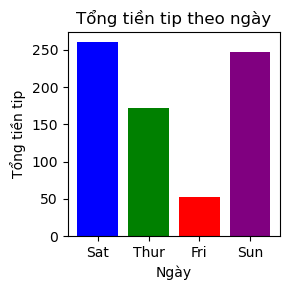

In [140]:

sat = df[df['day'] == 'Sat']['tip'].sum()
thur = df[df['day'] == 'Thur']['tip'].sum().round(2)
fri = df[df['day'] == 'Fri']['tip'].sum().round(2)
sun = df[df['day'] == 'Sun']['tip'].sum().round(2)

ngay = ['Sat', 'Thur', 'Fri', 'Sun']
tong_tien_tip = [sat, thur, fri, sun]

# Vẽ đồ thị
plt.figure(figsize=(3, 3))
plt.bar(ngay, tong_tien_tip, color=['blue', 'green', 'red', 'purple'])
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.tight_layout()
plt.show()

In [134]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

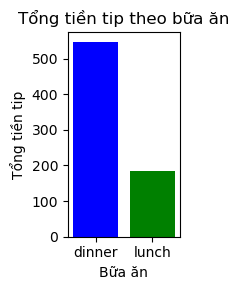

In [144]:
dinner = df[df['time'] == 'Dinner']['tip'].sum()
lunch = df[df['time'] == 'Lunch']['tip'].sum()

eat = ['dinner', 'lunch']
tong = [ dinner, lunch]

plt.figure(figsize=(2, 3))
plt.bar(eat, tong, color=['blue', 'green'])
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.tight_layout()
plt.show()

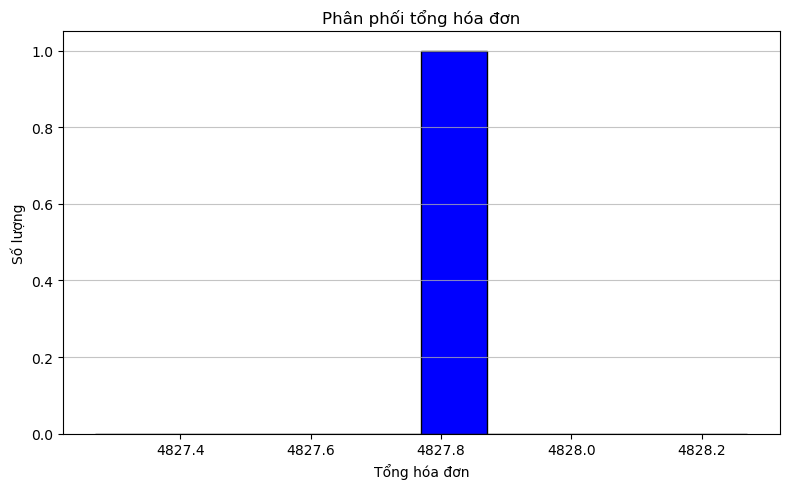

In [148]:
TongTienThanhToan = df['total_bill'].sum()

# print(TongTienThanhToan)

plt.figure(figsize=(8, 5))
plt.hist(TongTienThanhToan, bins=10, color='blue', edgecolor='black')
plt.title('Phân phối tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Số lượng')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

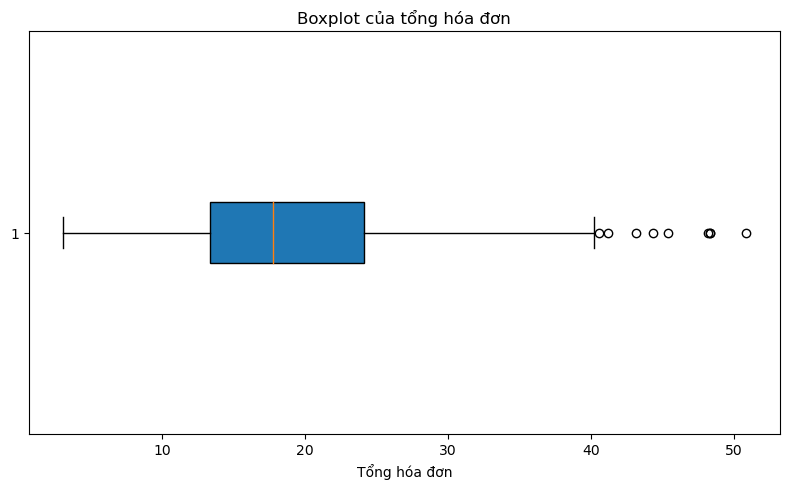

In [156]:
df['TongTienThanhToan'] = df['total_bill'].sum()

# print(df.TongTienThanhToan)
# df.head()

plt.figure(figsize=(8, 5))
plt.boxplot(df['total_bill'], vert=False, patch_artist=True)
plt.title('Boxplot của tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.tight_layout()
plt.show()

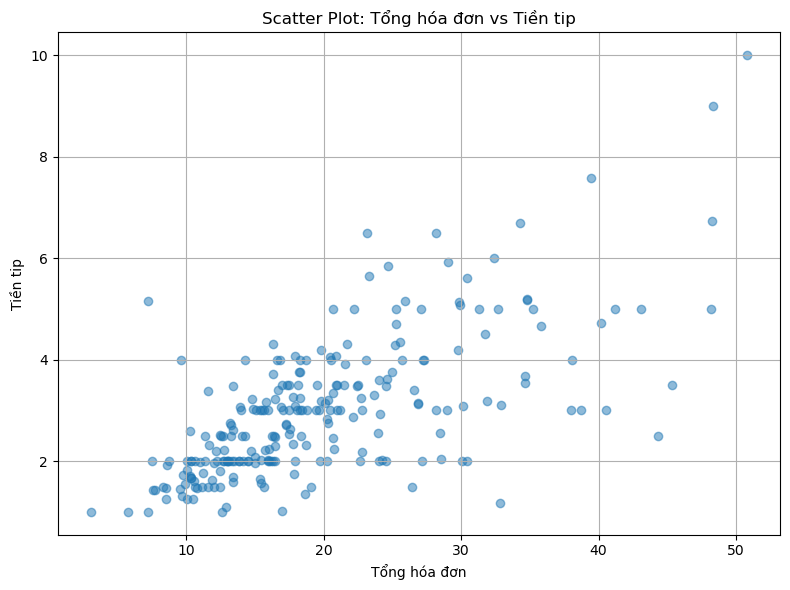

In [159]:
plt.figure(figsize=(8, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.5)
plt.title('Scatter Plot: Tổng hóa đơn vs Tiền tip')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tiền tip')
plt.grid(True)
plt.tight_layout()
plt.show()

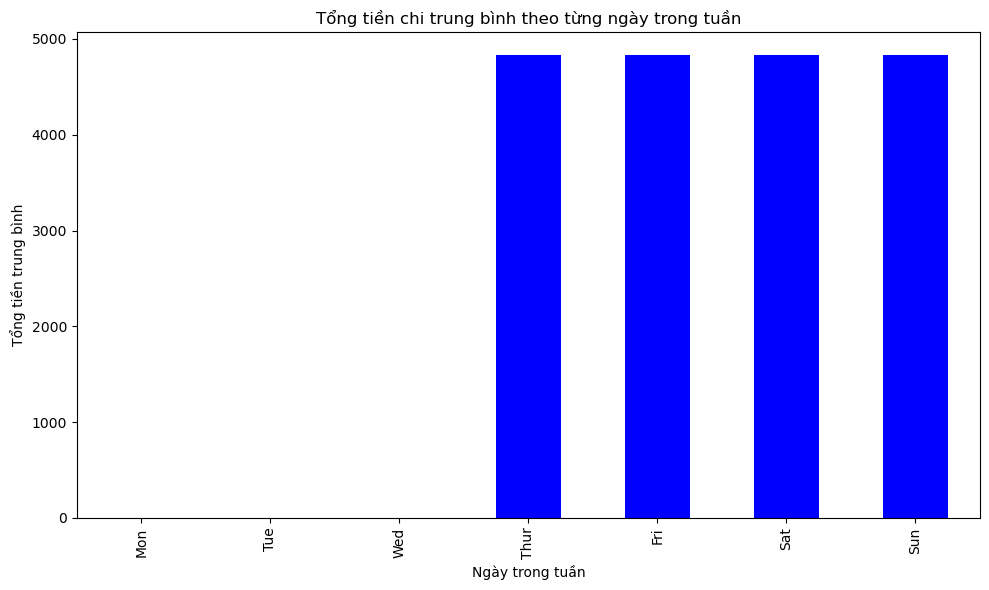

In [161]:
TongTienThanhToan = df['total_bill'].sum()

tong_tien_trung_binh = df.groupby('day')['TongTienThanhToan'].mean()

ngay_trong_tuan = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
tong_tien_trung_binh = tong_tien_trung_binh.reindex(ngay_trong_tuan)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
tong_tien_trung_binh.plot(kind='bar', color='blue')
plt.title('Tổng tiền chi trung bình theo từng ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Tổng tiền trung bình')
plt.tight_layout()
plt.show()

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn